<a href="https://colab.research.google.com/github/Jpliego95/Madrid-Housing-Dataset/blob/main/Entrega_Final%2BPliego%2BGitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Cómo podemos predecir los precios de los inmuebles en Madrid?

##Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# URL del archivo raw en GitHub
url = 'https://raw.githubusercontent.com/Jpliego95/Madrid-Housing-Dataset/main/House_Price.csv'

# Cargar el dataset
df1 = pd.read_csv(url, encoding='latin1')

# Ver las primeras filas del dataset
print(df1.head(10))

   Number    price house_type       house_type_v2 house_type_2  rooms  \
0       1  495,000   planta 1  Plantas inferiores     exterior      3   
1       2  485,000   planta 2  Plantas inferiores     exterior      2   
2       3  315,000   planta 2  Plantas inferiores     exterior      2   
3       4  585,000   planta 4  Plantas inferiores     exterior      2   
4       5  255,000       bajo              Sotano     exterior      3   
5       6  299,000   planta 1  Plantas inferiores     exterior      1   
6       7  265,000   planta 3  Plantas inferiores     exterior      2   
7       8  290,000   planta 3  Plantas inferiores     interior      4   
8       9  660,220   planta 2  Plantas inferiores     exterior      3   
9      10  525,000   planta 4  Plantas inferiores     exterior      4   

      rooms_v2     m2            m2_v2 price_m2 elevator garage  \
0  1 - 5 rooms  118.0  Piso intermedio    4,195       SI     SI   
1  1 - 5 rooms   82.0     Piso pequeño    5,915       SI     S

##Introduccion

###**Contexto empresarial:**
En una ciudad tan vibrante y trascendental como Madrid, el sueño de muchos trabajadores es alcanzar la estabilidad y seguridad de poseer su propio hogar. La búsqueda de una vivienda propia, más que un simple deseo, se convierte en una meta vital para quienes aspiran a establecerse en la capital española. Con su diversidad cultural, su rica historia y su dinamismo económico, Madrid no solo atrae a residentes nacionales, sino también a aquellos que llegan de todas partes del mundo en busca de oportunidades laborales y una mejor calidad de vida.

Sin embargo, en un mercado inmobiliario tan competitivo y en constante evolución como el de Madrid, la tarea de adquirir una propiedad se vuelve un desafío complejo. Los precios de los inmuebles varían considerablemente según la ubicación, el tamaño, las comodidades y otros factores determinantes. Para muchos, la transición de alquilar a ser propietario representa un hito significativo en su vida, pero también conlleva la necesidad de una cuidadosa evaluación y planificación financiera.

Es por ello que surge la necesidad de comprender en profundidad los mecanismos que influyen en la fluctuación de los precios de los inmuebles en Madrid. Este trabajo de investigación se propone abordar precisamente esa tarea, centrándose en identificar las mejores opciones para la compra de una propiedad y desentrañar los factores clave que determinan la variación de precios en los distintos segmentos del mercado inmobiliario.
###**Problema comercial:**
En este contexto, nos adentramos en un análisis profundo para comprender mejor los precios de los inmuebles en la ciudad de Madrid y las variables que influyen en ellos. Desde la ubicación del inmueble hasta los metros cuadrados, el contar con garaje o ascensor, cada aspecto será examinado minuciosamente para proporcionar una visión clara y detallada del mercado inmobiliario madrileño.

##**Objetivo:**
Nuestro objetivo es explorar una serie de preguntas clave que guiarán nuestras decisiones de inversión:

- Qué barrios son los que cuentan con mayor cantidad de inmuebles?
- Que cantidad de inmuebles cuentan con garage?
- Que cantidad de inmuebles cuentan con elevador?
- Qué barrios son los que cuentan con los inmuebles más caros?
- Qué barrios cuentan con los inmuebles más grandes en M2?
- Que barrios tienen el M2 más caro?
- Hay alguna relacion entre el tamaño de los inmuebles y el precio?
- Hay alguna relación entre el tamaño de los inmuebles y el garage?
- Hay alguna relación entre el tamaño de los inmuebles y el elevador?
- Cuales son las plantas mas cotizadas entre los inmuebles?

Con estas respuestas en mano, estaremos equipados para tomar decisiones informadas y estratégicas en el emocionante y competitivo mercado inmobiliario de Madrid.

##Obteniendo los datos relevantes

In [3]:
# Obtenemos el Dataset

df1.head (10)

Number    price house_type       house_type_v2 house_type_2  rooms  \
0       1  495,000   planta 1  Plantas inferiores     exterior      3   
1       2  485,000   planta 2  Plantas inferiores     exterior      2   
2       3  315,000   planta 2  Plantas inferiores     exterior      2   
3       4  585,000   planta 4  Plantas inferiores     exterior      2   
4       5  255,000       bajo              Sotano     exterior      3   
5       6  299,000   planta 1  Plantas inferiores     exterior      1   
6       7  265,000   planta 3  Plantas inferiores     exterior      2   
7       8  290,000   planta 3  Plantas inferiores     interior      4   
8       9  660,220   planta 2  Plantas inferiores     exterior      3   
9      10  525,000   planta 4  Plantas inferiores     exterior      4   

      rooms_v2     m2            m2_v2 price_m2 elevator garage  \
0  1 - 5 rooms  118.0  Piso intermedio    4,195       SI     SI   
1  1 - 5 rooms   82.0     Piso pequeño    5,915       SI     SI   
2  1 - 5 rooms   72.0     Piso pequeño    4,375       NO     NO   
3  1 - 5 rooms  174.0      Piso grande    3,362       SI     SI   
4  1 - 5 rooms   75.0     Piso pequeño    3,400       NO     NO   
5  1 - 5 rooms   69.0     Piso pequeño    4,333       SI     NO   
6  1 - 5 rooms   54.0     Piso pequeño    4,907       SI     NO   
7  1 - 5 rooms   69.0     Piso pequeño    4,203       SI     NO   
8  1 - 5 rooms  129.0  Piso intermedio    5,118       SI     SI   
9  1 - 5 rooms  111.0  Piso intermedio    4,730       SI     NO   

      neighborhood    district  
0          Chopera  Arganzuela  
1  Palos de Moguer  Arganzuela  
2          Legazpi  Arganzuela  
3  Palos de Moguer  Arganzuela  
4          Acacias  Arganzuela  
5          Chopera  Arganzuela  
6         Delicias  Arganzuela  
7          Chopera  Arganzuela  
8         Imperial  Arganzuela  
9          Chopera  Arganzuela

In [4]:
# Explicamos las columnas de nuestro dataset
df1.columns

Index(['Number', 'price', 'house_type', 'house_type_v2', 'house_type_2',
       'rooms', 'rooms_v2', 'm2', 'm2_v2', 'price_m2', 'elevator', 'garage',
       'neighborhood', 'district'],
      dtype='object')

Tenemos las siguientes columnas:

1.   number: El nuemero de registro en el dataset
2.  price: El precio del inmueble en euros
3. house_type: En que planta se encuentra el inmueble
4. house_type_v2: Una clasificacion mas generica sobre las plantas del inmueble
5. house_type_2: Si el piso es exterior o interior
6. rooms: La cantidad de habitaciones del piso
7. rooms_v2: Una clasificacion mas generica sobre las habitaciones del inmueble
8. m2: La cantidad de metros cuadrados del inmueble
9. m2_v2: Una clasificacion mas generica sobre el tamaño del inmueble
10. price_M2: El precio por metro cuadrado en euros
11. elevator: Si cuenta o no con elevador
12. garage: Si cuenta o no con garage
13. neighborhood: El barrio en el que se encuentra el inmueble
14. district: El distritro en el que se encuentra el inmueble

##Data Wrangling

En este apartado nos encargamos de realizar una limpieza de nuestra base de datos para dejarla lista para nuestro análisis.

Las acciones que realizamos sobre el dataset son:
- Eliminar las comas para convertir los datos de "price" y "price_m2" a formato numerico.
- Crear columnas con datos numericos para determinar las caracteristicas de los inmuebles. Esto se realizó con el fin de obtener más variables numericas para utilizar en el modelo de regresion lineal.  

  -Si tiene garage o no

  -Si tiene elevador o no
  
  -Si el piso es exterior o no

  -En qué barrio se encuentra el inmueble.

- Eliminar datos Outliers
- Eliminar filas que contengan datos vacios




In [5]:
# Elimina las comas y convertir a dato numerico el Precio y Precio por M2
df1['price'] = df1['price'].str.replace(',', '').astype(float)
df1['price_m2'] = df1['price_m2'].str.replace(',', '').astype(float)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         15975 non-null  int64  
 1   price          15975 non-null  float64
 2   house_type     15975 non-null  object 
 3   house_type_v2  15965 non-null  object 
 4   house_type_2   15506 non-null  object 
 5   rooms          15975 non-null  int64  
 6   rooms_v2       15966 non-null  object 
 7   m2             15975 non-null  float64
 8   m2_v2          15246 non-null  object 
 9   price_m2       15975 non-null  float64
 10  elevator       15975 non-null  object 
 11  garage         15975 non-null  object 
 12  neighborhood   15975 non-null  object 
 13  district       15975 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.7+ MB


In [7]:
#Verificamos si hay datos Null en el Dataframe
df1.isnull()

Number  price  house_type  house_type_v2  house_type_2  rooms  \
0       False  False       False          False         False  False   
1       False  False       False          False         False  False   
2       False  False       False          False         False  False   
3       False  False       False          False         False  False   
4       False  False       False          False         False  False   
...       ...    ...         ...            ...           ...    ...   
15970   False  False       False          False         False  False   
15971   False  False       False          False         False  False   
15972   False  False       False          False         False  False   
15973   False  False       False          False         False  False   
15974   False  False       False          False         False  False   

       rooms_v2     m2  m2_v2  price_m2  elevator  garage  neighborhood  \
0         False  False  False     False     False   False         False   
1         False  False  False     False     False   False         False   
2         False  False  False     False     False   False         False   
3         False  False  False     False     False   False         False   
4         False  False  False     False     False   False         False   
...         ...    ...    ...       ...       ...     ...           ...   
15970     False  False  False     False     False   False         False   
15971     False  False  False     False     False   False         False   
15972     False  False  False     False     False   False         False   
15973     False  False  False     False     False   False         False   
15974     False  False  False     False     False   False         False   

       district  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
15970     False  
15971     False  
15972     False  
15973     False  
15974     False  

[15975 rows x 14 columns]

In [8]:
#Informacion sobre los tipos de datos en cada columna del dataframe
df1.dtypes

Number             int64
price            float64
house_type        object
house_type_v2     object
house_type_2      object
rooms              int64
rooms_v2          object
m2               float64
m2_v2             object
price_m2         float64
elevator          object
garage            object
neighborhood      object
district          object
dtype: object

In [9]:
# Crear una nueva columna reemplazando los valores SI por 1 y los valores NO por 0 para determinar si tienen elevador/garage o no

mapeo = {'SI': 1, 'NO': 0}
df1['elevator number'] = df1['elevator'].map(mapeo)
df1['garage number'] = df1['garage'].map(mapeo)

In [10]:
# Crear una nueva columna reemplazando los valores Exterior por 1 y los valores Interior por 0 para determinar si el inmueble da a Exterior o Interior
mapeo = {'exterior': 1, 'interior': 0}
df1['house_type_2_numb'] = df1['house_type_2'].map(mapeo)


In [11]:
# Crear un diccionario de mapeo de nombres de barrios a números
mapeo = {'Arganzuela': 1, 'Barajas': 2, 'Barrio de Salamanca': 3, 'Carabanchel': 4, 'Centro': 5, 'Chamartin': 6, 'Chamberi': 7, 'Ciudad Lineal': 8, 'Fuencarral': 9, 'Hortaleza': 10, 'Latina': 11, 'Moncloa': 12, 'Moratalaz': 13, 'Puente de Vallecas': 14, 'Retiro': 15, 'San Blas': 16, 'Tetuan': 17, 'Usera': 18, 'Vicalvaro': 19, 'Villa de Vallecas': 20, 'Villaverde': 21}

# Crear la nueva columna con los numeros de barrio
df1['district number'] = df1['district'].map(mapeo)

df1.head(5)

Number     price house_type       house_type_v2 house_type_2  rooms  \
0       1  495000.0   planta 1  Plantas inferiores     exterior      3   
1       2  485000.0   planta 2  Plantas inferiores     exterior      2   
2       3  315000.0   planta 2  Plantas inferiores     exterior      2   
3       4  585000.0   planta 4  Plantas inferiores     exterior      2   
4       5  255000.0       bajo              Sotano     exterior      3   

      rooms_v2     m2            m2_v2  price_m2 elevator garage  \
0  1 - 5 rooms  118.0  Piso intermedio    4195.0       SI     SI   
1  1 - 5 rooms   82.0     Piso pequeño    5915.0       SI     SI   
2  1 - 5 rooms   72.0     Piso pequeño    4375.0       NO     NO   
3  1 - 5 rooms  174.0      Piso grande    3362.0       SI     SI   
4  1 - 5 rooms   75.0     Piso pequeño    3400.0       NO     NO   

      neighborhood    district  elevator number  garage number  \
0          Chopera  Arganzuela                1              1   
1  Palos de Moguer  Arganzuela                1              1   
2          Legazpi  Arganzuela                0              0   
3  Palos de Moguer  Arganzuela                1              1   
4          Acacias  Arganzuela                0              0   

   house_type_2_numb  district number  
0                1.0                1  
1                1.0                1  
2                1.0                1  
3                1.0                1  
4                1.0                1

In [12]:
# Genreamos una columna numerica para identificar el tipo de planta de cada inmueble
valores_unicos_house_type_v2 = df1['house_type_v2'].unique()


mapping = {
    'Sotano': 0,
    'Plantas inferiores': 1,
    'Plantas intermedias': 2,
    'Plantas altas': 3,
    'Casa': 4,
    'Chalet': 5
}


df1['house_type_v2_numerico'] = df1['house_type_v2'].map(mapping)


df1.head()

Number     price house_type       house_type_v2 house_type_2  rooms  \
0       1  495000.0   planta 1  Plantas inferiores     exterior      3   
1       2  485000.0   planta 2  Plantas inferiores     exterior      2   
2       3  315000.0   planta 2  Plantas inferiores     exterior      2   
3       4  585000.0   planta 4  Plantas inferiores     exterior      2   
4       5  255000.0       bajo              Sotano     exterior      3   

      rooms_v2     m2            m2_v2  price_m2 elevator garage  \
0  1 - 5 rooms  118.0  Piso intermedio    4195.0       SI     SI   
1  1 - 5 rooms   82.0     Piso pequeño    5915.0       SI     SI   
2  1 - 5 rooms   72.0     Piso pequeño    4375.0       NO     NO   
3  1 - 5 rooms  174.0      Piso grande    3362.0       SI     SI   
4  1 - 5 rooms   75.0     Piso pequeño    3400.0       NO     NO   

      neighborhood    district  elevator number  garage number  \
0          Chopera  Arganzuela                1              1   
1  Palos de Moguer  Arganzuela                1              1   
2          Legazpi  Arganzuela                0              0   
3  Palos de Moguer  Arganzuela                1              1   
4          Acacias  Arganzuela                0              0   

   house_type_2_numb  district number  house_type_v2_numerico  
0                1.0                1                     1.0  
1                1.0                1                     1.0  
2                1.0                1                     1.0  
3                1.0                1                     1.0  
4                1.0                1                     0.0

In [13]:
#Deteccion de Outliers
# Calcula el rango intercuartílico
Q1 = df1['price_m2'].quantile(0.25)
Q3 = df1['price_m2'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los outliers
outliers = df1[(df1['price_m2'] < lower_bound) | (df1['price_m2'] > upper_bound)]

# Muestra los outliers
print("Outliers:")
print(outliers)

Outliers:
       Number      price house_type        house_type_v2 house_type_2  rooms  \
779       780  4999999.0       bajo               Sotano     exterior     41   
812       813  1450000.0   planta 5  Plantas intermedias     exterior      2   
813       814  2800000.0   planta 3   Plantas inferiores     exterior      3   
814       815  1590000.0   planta 2   Plantas inferiores     interior      2   
823       824  2800000.0   planta 3   Plantas inferiores     exterior      3   
...       ...        ...        ...                  ...          ...    ...   
12588   12589  2650000.0   planta 3   Plantas inferiores     exterior      4   
12589   12590   690000.0   planta 1   Plantas inferiores     interior      1   
13472   13473   675495.0       bajo               Sotano     exterior      3   
14109   14110  3600000.0   planta 5  Plantas intermedias     exterior      4   
14125   14126  3600000.0   planta 5  Plantas intermedias     exterior      4   

          rooms_v2      m2   

In [14]:
#Generamos el Dataset sin los Outliers
df1 = df1[(df1['price_m2'] >= lower_bound) & (df1['price_m2'] <= upper_bound)]
df1

Number     price house_type       house_type_v2 house_type_2  rooms  \
0           1  495000.0   planta 1  Plantas inferiores     exterior      3   
1           2  485000.0   planta 2  Plantas inferiores     exterior      2   
2           3  315000.0   planta 2  Plantas inferiores     exterior      2   
3           4  585000.0   planta 4  Plantas inferiores     exterior      2   
4           5  255000.0       bajo              Sotano     exterior      3   
...       ...       ...        ...                 ...          ...    ...   
15970   15971  155000.0   planta 3  Plantas inferiores     exterior      4   
15971   15972  108000.0   planta 3  Plantas inferiores     exterior      3   
15972   15973  140000.0       bajo              Sotano     exterior      2   
15973   15974  135000.0   planta 1  Plantas inferiores     exterior      2   
15974   15975  150000.0   planta 4  Plantas inferiores     exterior      4   

          rooms_v2     m2            m2_v2  price_m2 elevator garage  \
0      1 - 5 rooms  118.0  Piso intermedio    4195.0       SI     SI   
1      1 - 5 rooms   82.0     Piso pequeño    5915.0       SI     SI   
2      1 - 5 rooms   72.0     Piso pequeño    4375.0       NO     NO   
3      1 - 5 rooms  174.0      Piso grande    3362.0       SI     SI   
4      1 - 5 rooms   75.0     Piso pequeño    3400.0       NO     NO   
...            ...    ...              ...       ...      ...    ...   
15970  1 - 5 rooms  106.0  Piso intermedio    1462.0       NO     NO   
15971  1 - 5 rooms   60.0     Piso pequeño    1800.0       NO     NO   
15972  1 - 5 rooms   65.0     Piso pequeño    2154.0       NO     NO   
15973  1 - 5 rooms   71.0     Piso pequeño    1901.0       NO     NO   
15974  1 - 5 rooms   71.0     Piso pequeño    2113.0       SI     NO   

          neighborhood    district  elevator number  garage number  \
0              Chopera  Arganzuela                1              1   
1      Palos de Moguer  Arganzuela                1              1   
2              Legazpi  Arganzuela                0              0   
3      Palos de Moguer  Arganzuela                1              1   
4              Acacias  Arganzuela                0              0   
...                ...         ...              ...            ...   
15970  Villaverde Alto  Villaverde                0              0   
15971   San CristÃ³bal  Villaverde                0              0   
15972   San CristÃ³bal  Villaverde                0              0   
15973      Los Rosales  Villaverde                0              0   
15974   San CristÃ³bal  Villaverde                1              0   

       house_type_2_numb  district number  house_type_v2_numerico  
0                    1.0                1                     1.0  
1                    1.0                1                     1.0  
2                    1.0                1                     1.0  
3                    1.0                1                     1.0  
4                    1.0                1                     0.0  
...                  ...              ...                     ...  
15970                1.0               21                     1.0  
15971                1.0               21                     1.0  
15972                1.0               21                     0.0  
15973                1.0               21                     1.0  
15974                1.0               21                     1.0  

[15507 rows x 19 columns]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15507 entries, 0 to 15974
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number                  15507 non-null  int64  
 1   price                   15507 non-null  float64
 2   house_type              15507 non-null  object 
 3   house_type_v2           15497 non-null  object 
 4   house_type_2            15038 non-null  object 
 5   rooms                   15507 non-null  int64  
 6   rooms_v2                15501 non-null  object 
 7   m2                      15507 non-null  float64
 8   m2_v2                   14907 non-null  object 
 9   price_m2                15507 non-null  float64
 10  elevator                15507 non-null  object 
 11  garage                  15507 non-null  object 
 12  neighborhood            15507 non-null  object 
 13  district                15507 non-null  object 
 14  elevator number         15507 non-null  int

In [16]:
df1.isnull().sum()

Number                      0
price                       0
house_type                  0
house_type_v2              10
house_type_2              469
rooms                       0
rooms_v2                    6
m2                          0
m2_v2                     600
price_m2                    0
elevator                    0
garage                      0
neighborhood                0
district                    0
elevator number             0
garage number               0
house_type_2_numb         469
district number             0
house_type_v2_numerico     10
dtype: int64

In [17]:
#Eliminamos los Inmuebles que tengan campos vacios
df1 = df1.dropna()

In [18]:
df1.isnull().sum()

Number                    0
price                     0
house_type                0
house_type_v2             0
house_type_2              0
rooms                     0
rooms_v2                  0
m2                        0
m2_v2                     0
price_m2                  0
elevator                  0
garage                    0
neighborhood              0
district                  0
elevator number           0
garage number             0
house_type_2_numb         0
district number           0
house_type_v2_numerico    0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14438 entries, 0 to 15974
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number                  14438 non-null  int64  
 1   price                   14438 non-null  float64
 2   house_type              14438 non-null  object 
 3   house_type_v2           14438 non-null  object 
 4   house_type_2            14438 non-null  object 
 5   rooms                   14438 non-null  int64  
 6   rooms_v2                14438 non-null  object 
 7   m2                      14438 non-null  float64
 8   m2_v2                   14438 non-null  object 
 9   price_m2                14438 non-null  float64
 10  elevator                14438 non-null  object 
 11  garage                  14438 non-null  object 
 12  neighborhood            14438 non-null  object 
 13  district                14438 non-null  object 
 14  elevator number         14438 non-null  int

##Analizando los puntos de nuestra investigacion

###Qué barrios son los que cuentan con mayor cantidad de inmuebles?


A traves de esta grafica, podemos observar cuáles son los barrios en los que hay mayor oferta de inmuebles en Madrid.

Los resultados son claros: el Barrio de Salamanca se alza como el epicentro de esta ciudad.

El prestigioso Barrio de Salamanca, emblema de exclusividad y distinción, emerge como líder indiscutible en cuanto a oferta de inmuebles se refiere. Situado en el codiciado distrito de Salamanca, al este del centro de la ciudad, este barrio cautiva con su aura elegante, sus majestuosas edificaciones y su exquisita selección de boutiques de alta gama.

Al abrazar la combinación perfecta de historia, lujo y estilo de vida, el Barrio de Salamanca se erige como un imán para aquellos que buscan la excelencia en la vivienda en la vibrante metrópoli de Madrid.





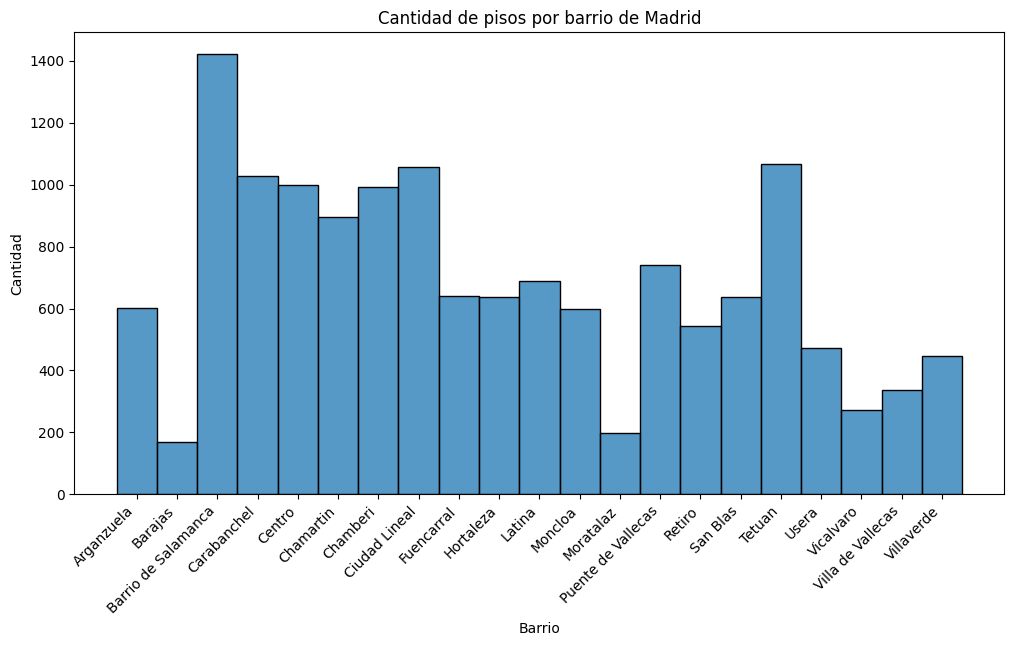

In [20]:
# @title
# Mostramos un grafico con la cantidad de inmuebles por barrio
plt.figure(figsize=(12, 6))
sns.histplot (data=df1, x="district")
plt.title('Cantidad de pisos por barrio de Madrid')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.show()


In [21]:
# @title
# Mostramos la cantidad de inmuebles por barrio con datos numericos
cantidad_por_distrito = df1.groupby('district')["Number"].count().round(2)
print(cantidad_por_distrito)

district
Arganzuela              603
Barajas                 169
Barrio de Salamanca    1421
Carabanchel            1027
Centro                  999
Chamartin               895
Chamberi                992
Ciudad Lineal          1056
Fuencarral              639
Hortaleza               636
Latina                  689
Moncloa                 598
Moratalaz               197
Puente de Vallecas      740
Retiro                  543
San Blas                636
Tetuan                 1068
Usera                   474
Vicalvaro               273
Villa de Vallecas       336
Villaverde              447
Name: Number, dtype: int64


###Qué cantidad de inmuebles cuentan con Garage?

A traves de esta gráfica, podemos sumergirnos en la distribución de inmuebles con y sin garaje en cada uno de los barrios de Madrid.

Este gráfico nos ofrece una perspectiva clara y detallada de la proporción de inmuebles que ofrecen la comodidad de contar con garaje, así como aquellos que carecen de esta facilidad en cada rincón de la ciudad.

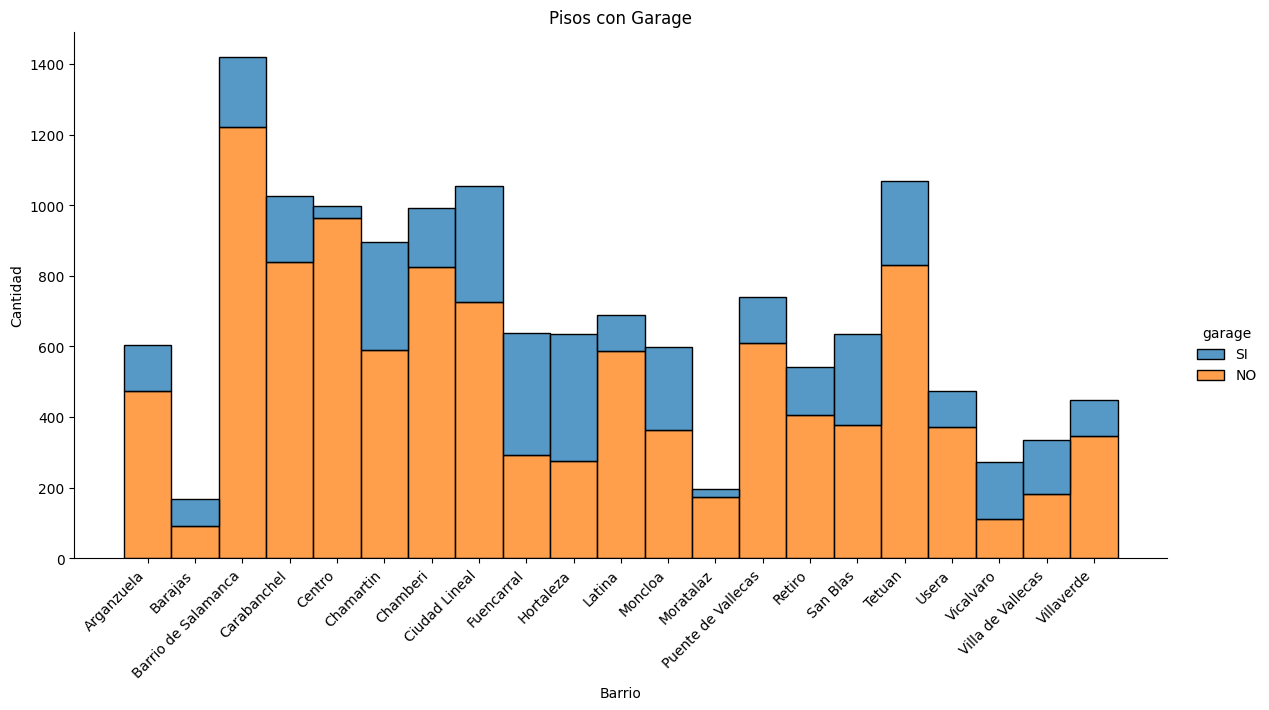

In [22]:
# Mostramos un grafico con la cantidad de inmuebles por barrio que tienen garage

sns.displot(data=df1, x="district", hue="garage", multiple="stack", height=6, aspect=2)
plt.title('Pisos con Garage')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()


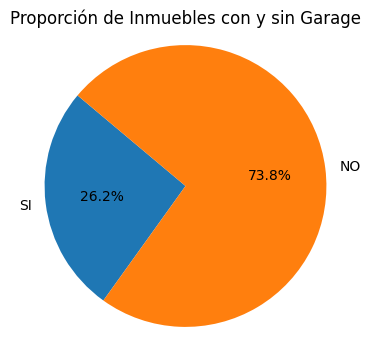

In [23]:
# Mostramos un grafico con la cantidad de inmuebles que tienen garage
garage_counts = df1['garage'].value_counts()


garage_counts = garage_counts[::-1]


plt.figure(figsize=(4, 4))
plt.pie(garage_counts, labels=garage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Inmuebles con y sin Garage')
plt.axis('equal')
plt.show()

###Qué cantidad de inmuebles cuentan con elevador?


A traves de esta grafica, podemos observar en cada barrio qué proporcion de inmuebles cuentan con elevador y cuales no.

A simple vista podemos observar que los pisos ubicados en los barrios mas antiguos son aquellos que cuentan con una proporcion menor de elevadores.



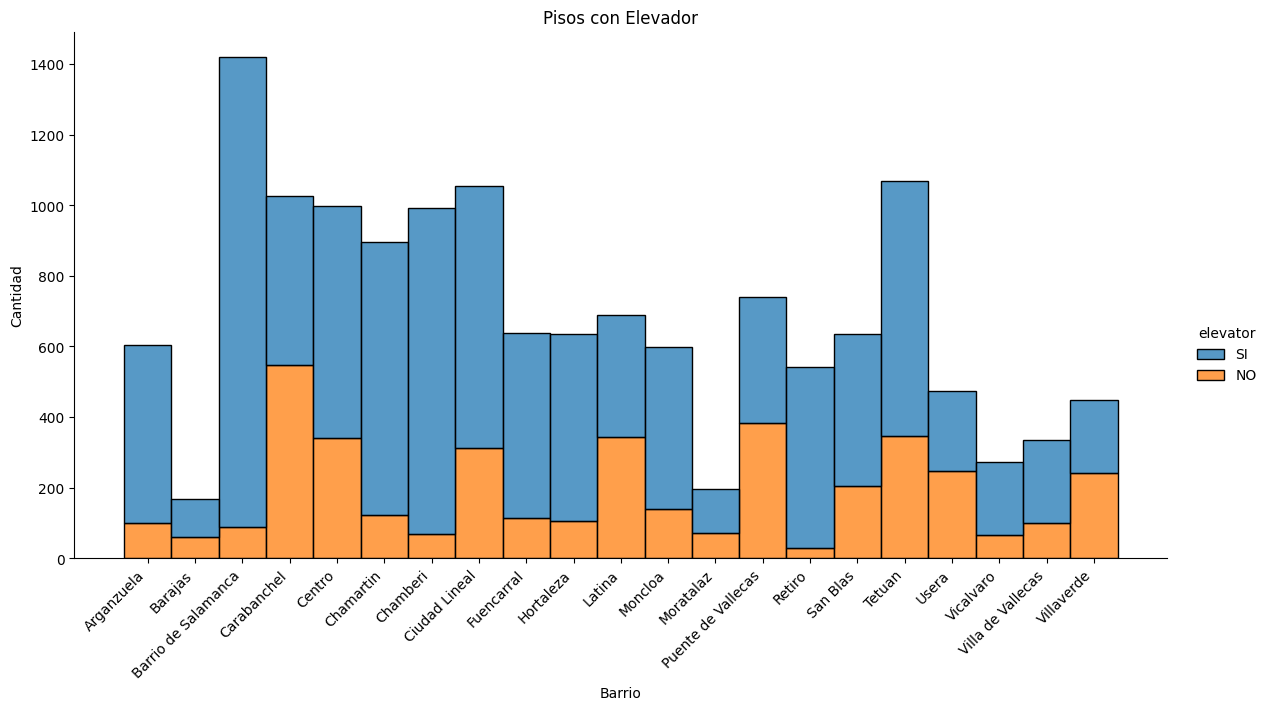

In [24]:
# Mostramos un grafico con la cantidad de inmuebles por barrio que tienen elevador

sns.displot (data=df1, x="district", hue="elevator", multiple="stack", height=6, aspect=2)
plt.title('Pisos con Elevador')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

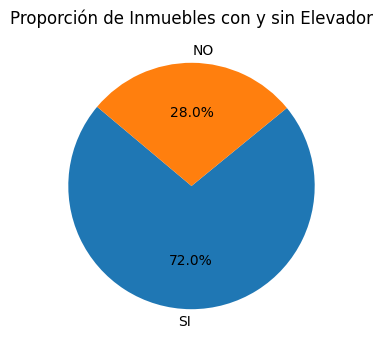

In [25]:
# Mostramos un grafico con la cantidad de inmuebles que tienen elevador
elevator_counts = df1['elevator'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(elevator_counts, labels=elevator_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Inmuebles con y sin Elevador')
plt.show()

###Qué barrios son los que cuentan con los inmuebles más caros?


A traves de esta grafica, podemos observar el precio promedio de los inmuebles por barrio. Tambien, al tratarse de un Barplot podemos ver la dispersion entre los datos
de cada barrio. A simple vista podemos observar que los inmuebles más caros se encuentran en el barrio de Salamanca.



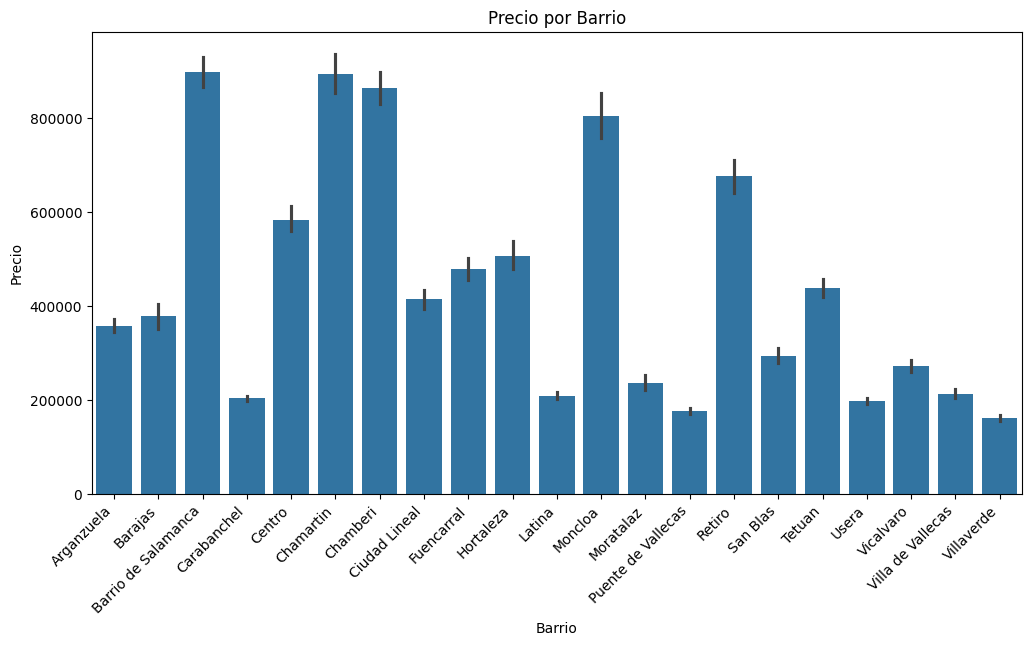

In [26]:
# Mostramos un grafico con los precios promedio de los inmuebles por barrio
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x="district", y="price")
plt.title('Precio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# Mostramos los precios promedio de los inmuebles por barrio
promedio_por_distrito = df1.groupby('district')['price'].mean().round(2)
print(promedio_por_distrito)

district
Arganzuela             359201.63
Barajas                380031.35
Barrio de Salamanca    899229.39
Carabanchel            204562.74
Centro                 584542.06
Chamartin              894053.64
Chamberi               864496.21
Ciudad Lineal          414748.76
Fuencarral             479221.07
Hortaleza              507563.38
Latina                 209739.72
Moncloa                805350.18
Moratalaz              237187.21
Puente de Vallecas     177013.04
Retiro                 676707.25
San Blas               295159.68
Tetuan                 438676.99
Usera                  198250.15
Vicalvaro              272468.48
Villa de Vallecas      214225.27
Villaverde             163323.84
Name: price, dtype: float64


###Qué barrios cuentan con los inmuebles más grandes en M2?

A traves de esta grafica, podemos observar los M2 promedio de los inmuebles por barrio. Tambien, al tratarse de un Barplot podemos ver la dispersion entre los datos
de cada barrio. A simple vista podemos observar que los inmuebles con mayor M2 se encuentran en el barrio de Moncloa.


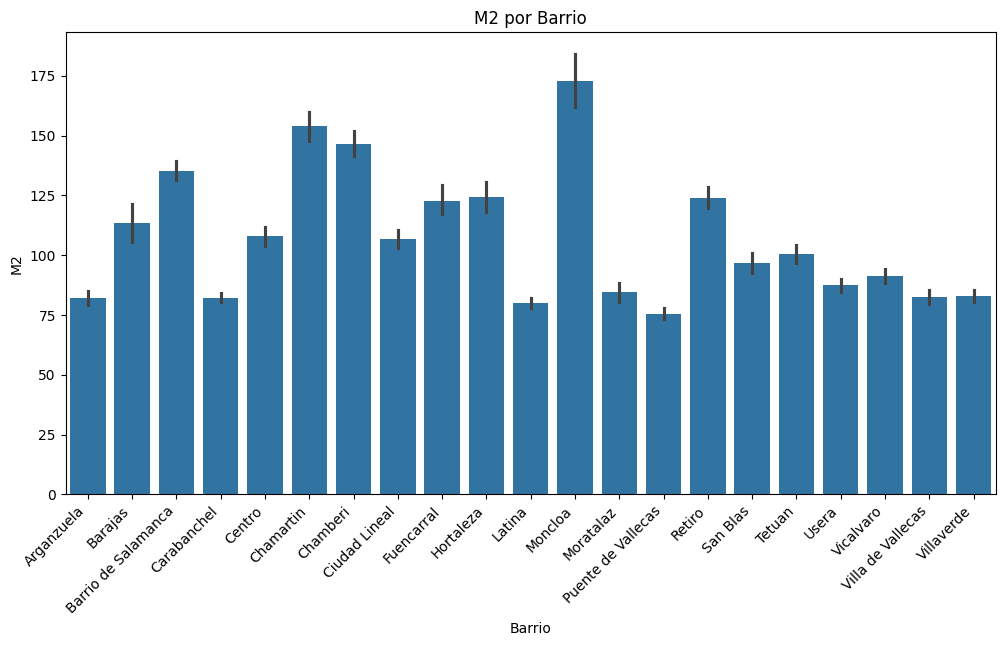

In [28]:
# Mostramos un grafico con los M2 promedio de los inmuebles por barrio
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x="district", y="m2")
plt.title('M2 por Barrio')
plt.xlabel('Barrio')
plt.ylabel('M2')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
# Mostramos los M2 promedio de los inmuebles por barrio
promedio_por_distrito = df1.groupby('district')['m2'].mean().round(2)
print(promedio_por_distrito)

district
Arganzuela              82.05
Barajas                113.37
Barrio de Salamanca    135.28
Carabanchel             82.28
Centro                 107.97
Chamartin              154.00
Chamberi               146.58
Ciudad Lineal          106.89
Fuencarral             122.82
Hortaleza              124.17
Latina                  80.00
Moncloa                172.86
Moratalaz               84.51
Puente de Vallecas      75.32
Retiro                 124.11
San Blas                96.68
Tetuan                 100.57
Usera                   87.41
Vicalvaro               91.44
Villa de Vallecas       82.62
Villaverde              82.81
Name: m2, dtype: float64


###Qué barrios tienen el M2 más caro?


A traves de esta grafica, podemos observar el precio promedio del M2 de los inmuebles por barrio. Se puede ver que los barrios con el M2 mas caros de la ciudad son el barrio de Salamanca y Chamberi.



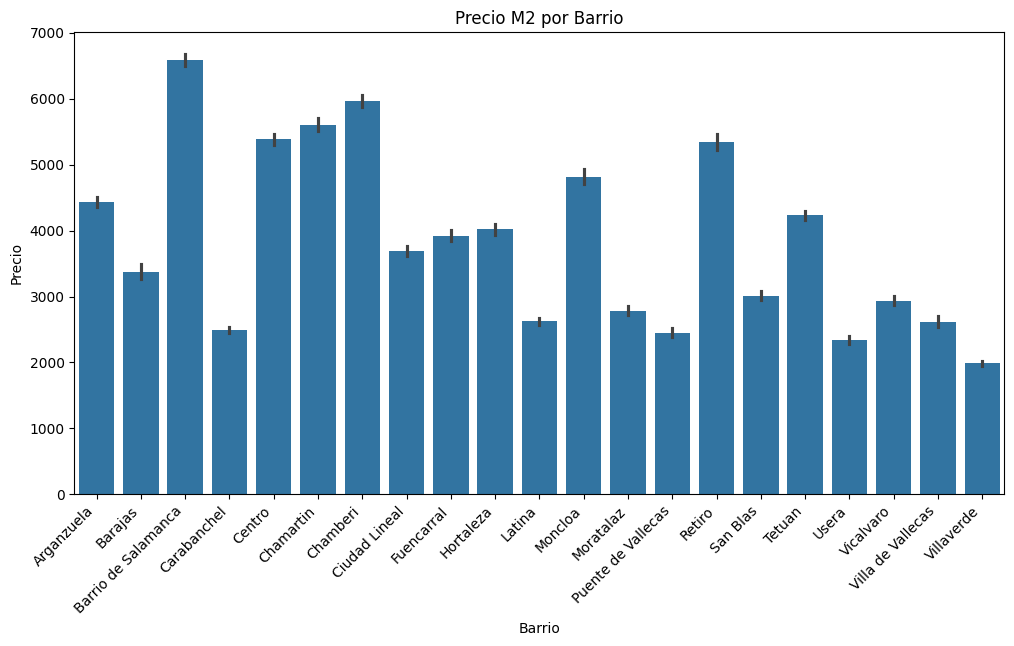

In [30]:
# Mostramos un grafico con el precio por M2 promedio de los inmuebles por barrio
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x="district", y="price_m2")
plt.title('Precio M2 por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# Mostramos el precio por M2 promedio de los inmuebles por barrio
promedio_por_distrito = df1.groupby('district')['price_m2'].mean().round(2)
print(promedio_por_distrito)

district
Arganzuela             4433.24
Barajas                3377.07
Barrio de Salamanca    6582.74
Carabanchel            2495.26
Centro                 5381.69
Chamartin              5607.84
Chamberi               5970.11
Ciudad Lineal          3684.25
Fuencarral             3920.43
Hortaleza              4019.75
Latina                 2622.65
Moncloa                4810.84
Moratalaz              2785.66
Puente de Vallecas     2449.07
Retiro                 5345.89
San Blas               3009.03
Tetuan                 4231.21
Usera                  2339.76
Vicalvaro              2939.02
Villa de Vallecas      2617.16
Villaverde             1985.94
Name: price_m2, dtype: float64


###Hay alguna relacion entre el tamaño de los inmuebles y el precio?

A traves de esta grafica, podemos observar la relación que hay entre el precio de un inmueble y la cantidad de M2 del inmueble. Logicamente, a mayor cantidad de M2 mayor será
el precio del inmueble.


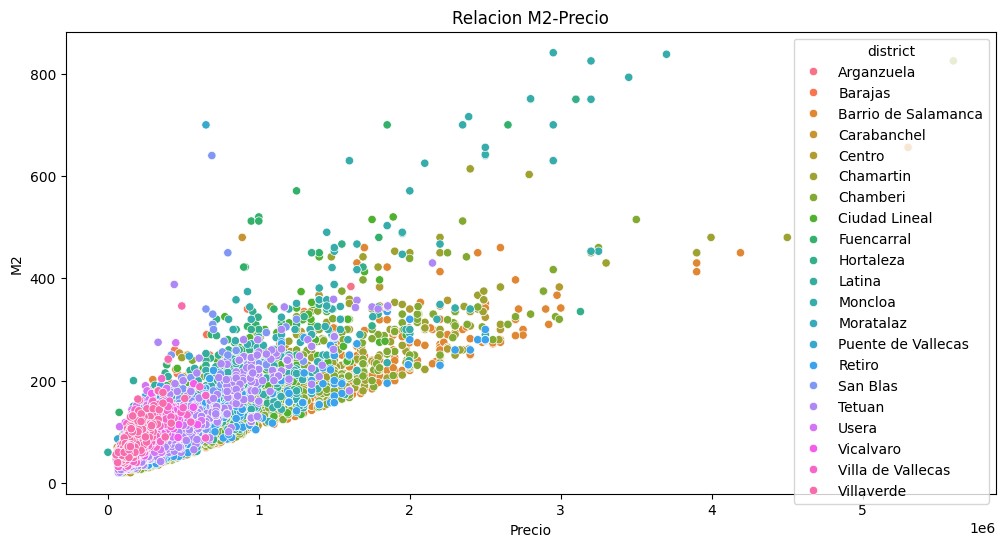

In [32]:
# Mostramos un grafico la relacion entre el M2 y Precio de los inmuebles por barrio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x="price", y="m2", hue="district")
plt.title('Relacion M2-Precio')
plt.xlabel('Precio')
plt.ylabel('M2')
plt.show()

###Hay alguna relacion entre el tamaño de los inmuebles y el garage?

A traves del siguiente grafico podemos observar que generalmente los inmuebles con menor cantidad de M2 no suelen tener garage, esto es normal en una ciudad como Madrid donde los edificios suelen ser antiguos. En cambio, a medida que los inmuebles son de mayor superficie si suelen contar con Garage, seguramente se traten de Casas, Chaltes o edificios mas nuevos.

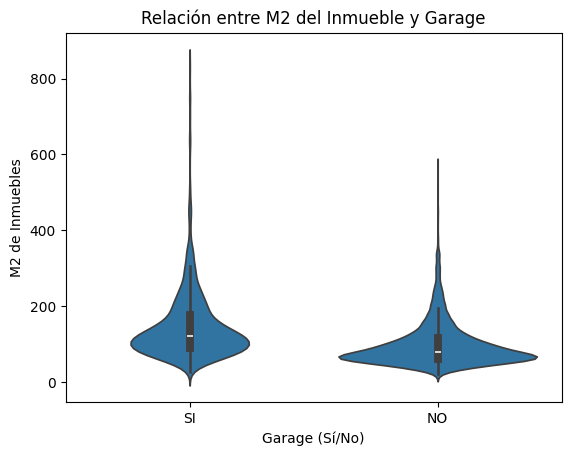

In [33]:
# Mostramos un grafico la relacion entre los M2 de los inmuebles con y sin garage
sns.violinplot(data=df1, x='garage', y='m2')

plt.title('Relación entre M2 del Inmueble y Garage')
plt.ylabel('M2 de Inmuebles')
plt.xlabel('Garage (Sí/No)')

plt.show()

###Hay alguna relacion entre el tamaño de los inmuebles y el elevador?

A traves del siguiente grafico podemos observar que los inmuebles mas pequeños no suelen contar con elevador, esto se debe a que, como mencionamos previamente, muchos inmuebles en Madrid son antiguos. Sin embargo, a medida que tienen mayor superficie, hay mas inmuebles con elevador, seguramente son edificios mas nuevos. Por ultimo, los inmuebles con mayor M2 tampoco tienen elevador ya que seguro se trate de Casas o Chalets.

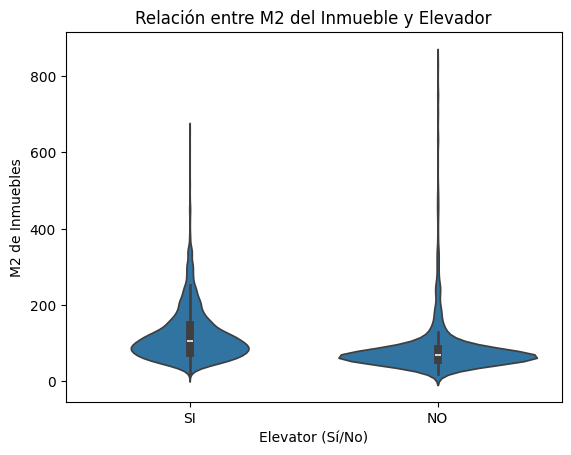

In [34]:
# Mostramos un grafico la relacion entre los M2 de los inmuebles con y sin elevador
sns.violinplot(data=df1, x='elevator', y='m2')
plt.title('Relación entre M2 del Inmueble y Elevador')
plt.ylabel('M2 de Inmuebles')
plt.xlabel('Elevator (Sí/No)')

plt.show()

###Hay alguna relacion entre el precio del m2, el garage y el elevador?

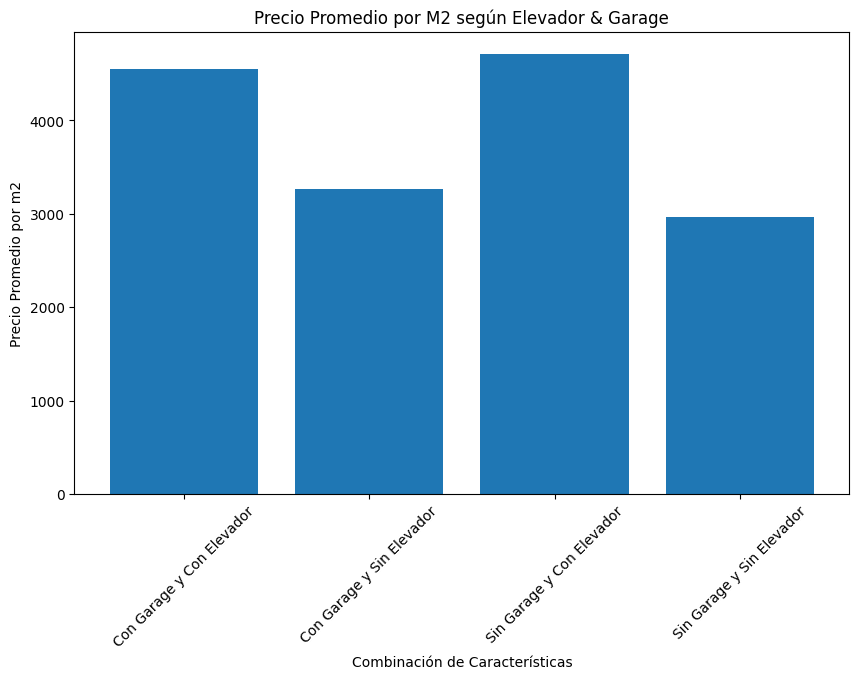

In [35]:
# Mostramos un grafico la relacion entre el precio por M2 de los inmuebles segun si tienen elevador y garage o no

# Calcular el precio promedio por metro cuadrado para cada combinación de características
avg_price_by_combination = df1.groupby(['garage', 'elevator'])['price_m2'].mean().reset_index()

# Mapear los valores "SI" y "NO" a etiquetas más descriptivas
avg_price_by_combination['garage'] = avg_price_by_combination['garage'].map({'SI': 'Con Garage', 'NO': 'Sin Garage'})
avg_price_by_combination['elevator'] = avg_price_by_combination['elevator'].map({'SI': 'Con Elevador', 'NO': 'Sin Elevador'})

# Crear un diccionario para mapear las combinaciones a etiquetas más descriptivas
combination_labels = {
    ('Con Garage', 'Con Elevador'): 'Con Garage y Con Elevador',
    ('Con Garage', 'Sin Elevador'): 'Con Garage y Sin Elevador',
    ('Sin Garage', 'Con Elevador'): 'Sin Garage y Con Elevador',
    ('Sin Garage', 'Sin Elevador'): 'Sin Garage y Sin Elevador'
}

# Aplicar el mapeo para obtener las etiquetas descriptivas de las combinaciones
avg_price_by_combination['Combination'] = avg_price_by_combination[['garage', 'elevator']].apply(lambda x: combination_labels[(x['garage'], x['elevator'])], axis=1)

# Ordenar las combinaciones para mostrarlas en el gráfico en un orden específico
order = ['Con Garage y Con Elevador', 'Con Garage y Sin Elevador', 'Sin Garage y Con Elevador', 'Sin Garage y Sin Elevador']
avg_price_by_combination['Combination'] = pd.Categorical(avg_price_by_combination['Combination'], categories=order, ordered=True)
avg_price_by_combination = avg_price_by_combination.sort_values('Combination')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_combination['Combination'], avg_price_by_combination['price_m2'])
plt.title('Precio Promedio por M2 según Elevador & Garage')
plt.xlabel('Combinación de Características')
plt.ylabel('Precio Promedio por m2')
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-9a44c4b2a947>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Combination'] = df1['garage'] + ' y ' + df1['elevator']
<ipython-input-36-9a44c4b2a947>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Combination'] = df1['Combination'].replace({'SI y SI': 'Con Garage y Con Elevador',
<ipython-input-36-9a44c4b2a947>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


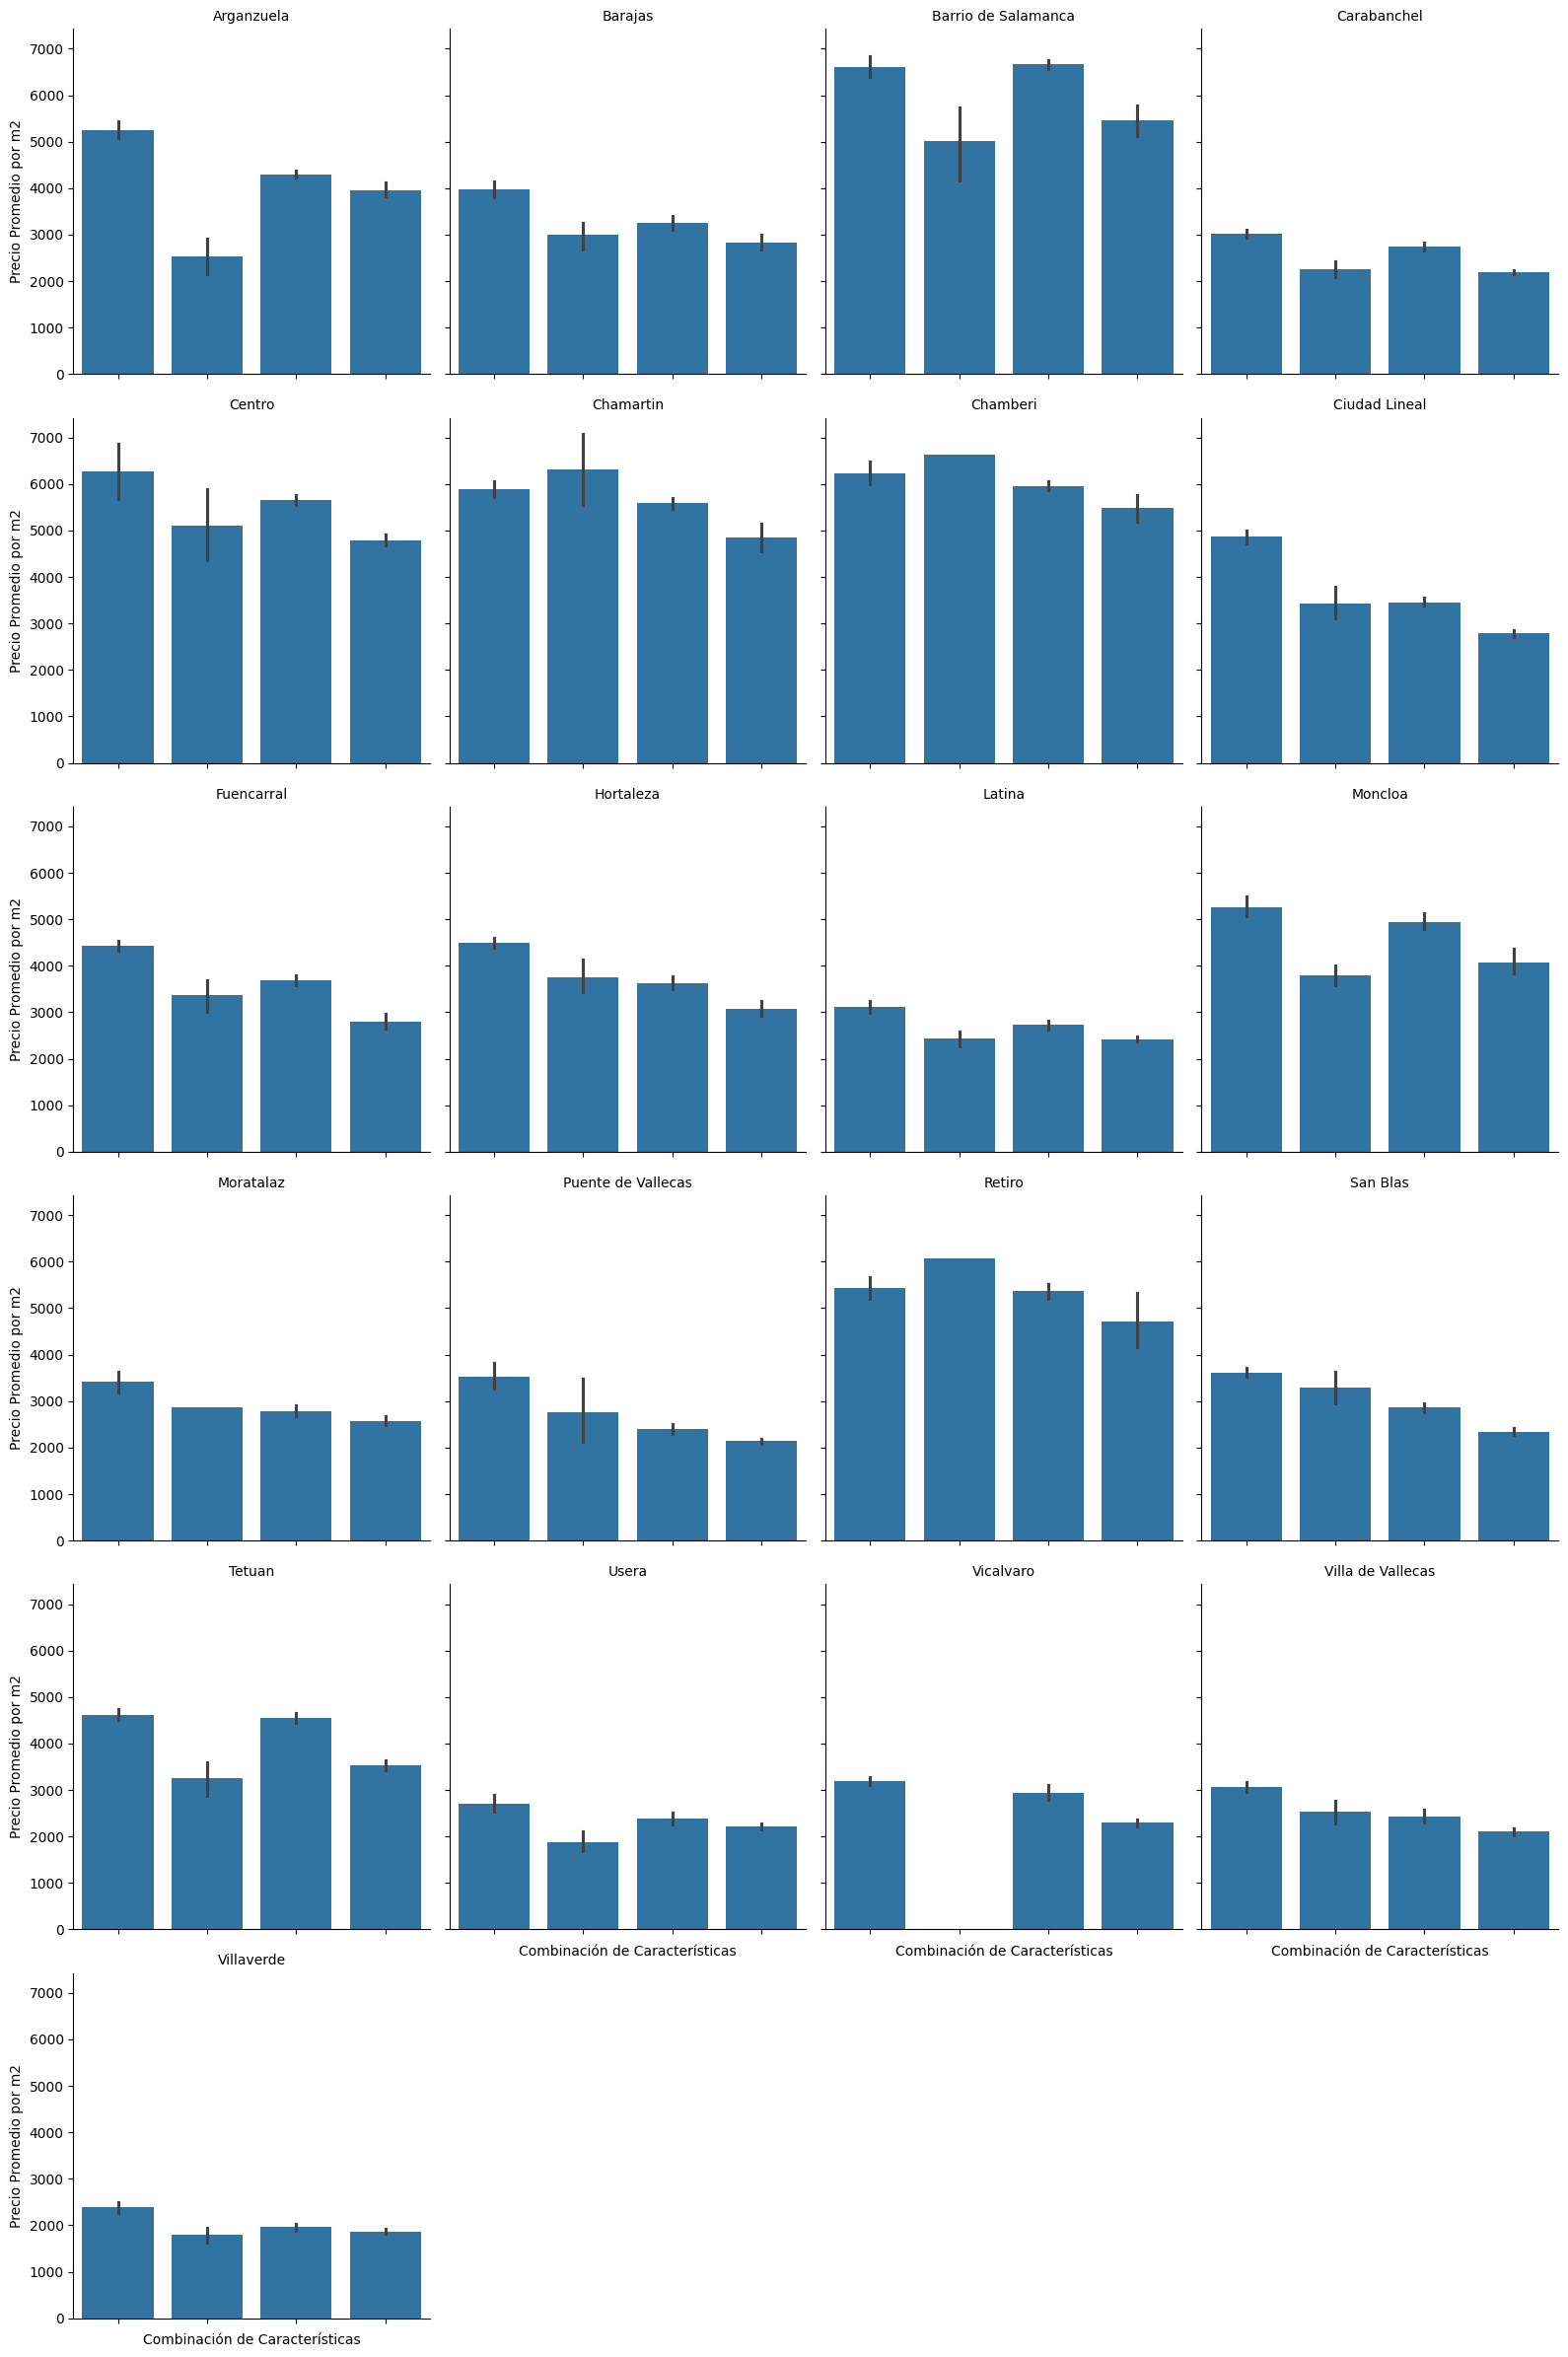

In [36]:
# @title
# Crear una nueva columna que represente las cuatro combinaciones de características
df1['Combination'] = df1['garage'] + ' y ' + df1['elevator']

# Mapear los valores "SI" y "NO" a etiquetas más descriptivas
df1['Combination'] = df1['Combination'].replace({'SI y SI': 'Con Garage y Con Elevador',
                                                 'SI y NO': 'Con Garage y Sin Elevador',
                                                 'NO y SI': 'Sin Garage y Con Elevador',
                                                 'NO y NO': 'Sin Garage y Sin Elevador'})

# Crear FacetGrid distribuido por "district"
g = sns.FacetGrid(df1, col="district", col_wrap=4, height=4)

# Mapear los datos y crear gráficos de barras para cada combinación de características
g.map(sns.barplot, "Combination", "price_m2", order=['Con Garage y Con Elevador', 'Con Garage y Sin Elevador', 'Sin Garage y Con Elevador', 'Sin Garage y Sin Elevador'])

# Ajustar los títulos y las etiquetas de los ejes
g.set_titles('{col_name}')
g.set_axis_labels('Combinación de Características', 'Precio Promedio por m2')

# Ajustar el espaciado entre las etiquetas del eje x
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


plt.tight_layout()
plt.show()

###Cuales son las plantas más cotizadas entre los inmuebles?

A traves del siguiente grafico podemos observar que los inmuebles más caros en Madrid suelen ser las casas o chalets. Sin embargo, si dejamos fuera estas dos categorias y nos enfocamos en las plantas de un edificio, podemos observar que efectivamente los inmuebles que son sótanos son los mas baratos, seguidos por las plantas inferiores, luego las plantas intermedias y un poco mas costosas las plantas altas.

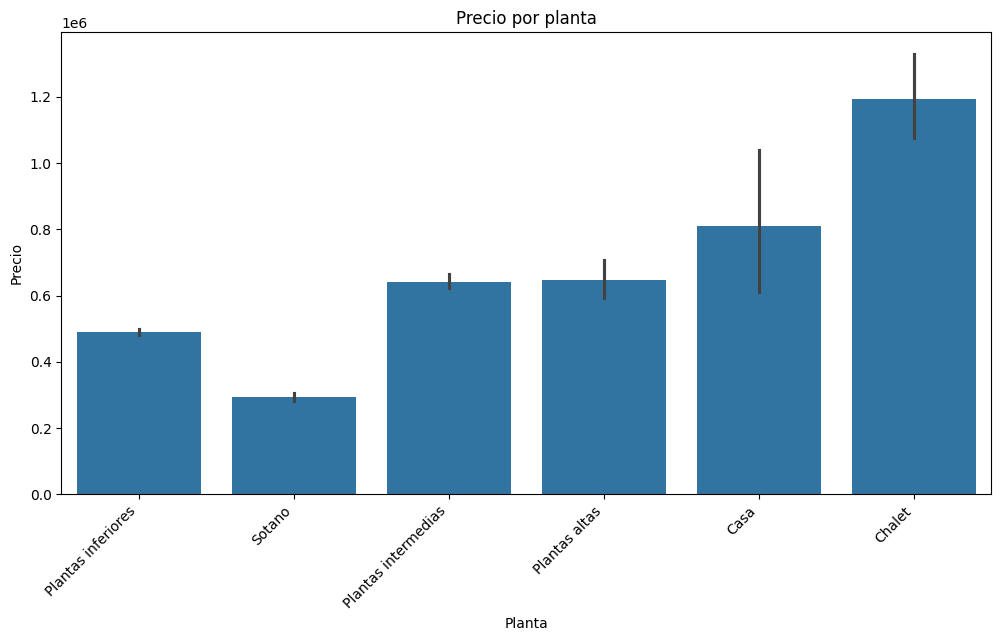

In [37]:
# Mostramos un grafico la relacion entre el precio de los inmuebles y el tipo de planta
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x="house_type_v2", y="price")
plt.title('Precio por planta')
plt.xlabel('Planta')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x600 with 0 Axes>

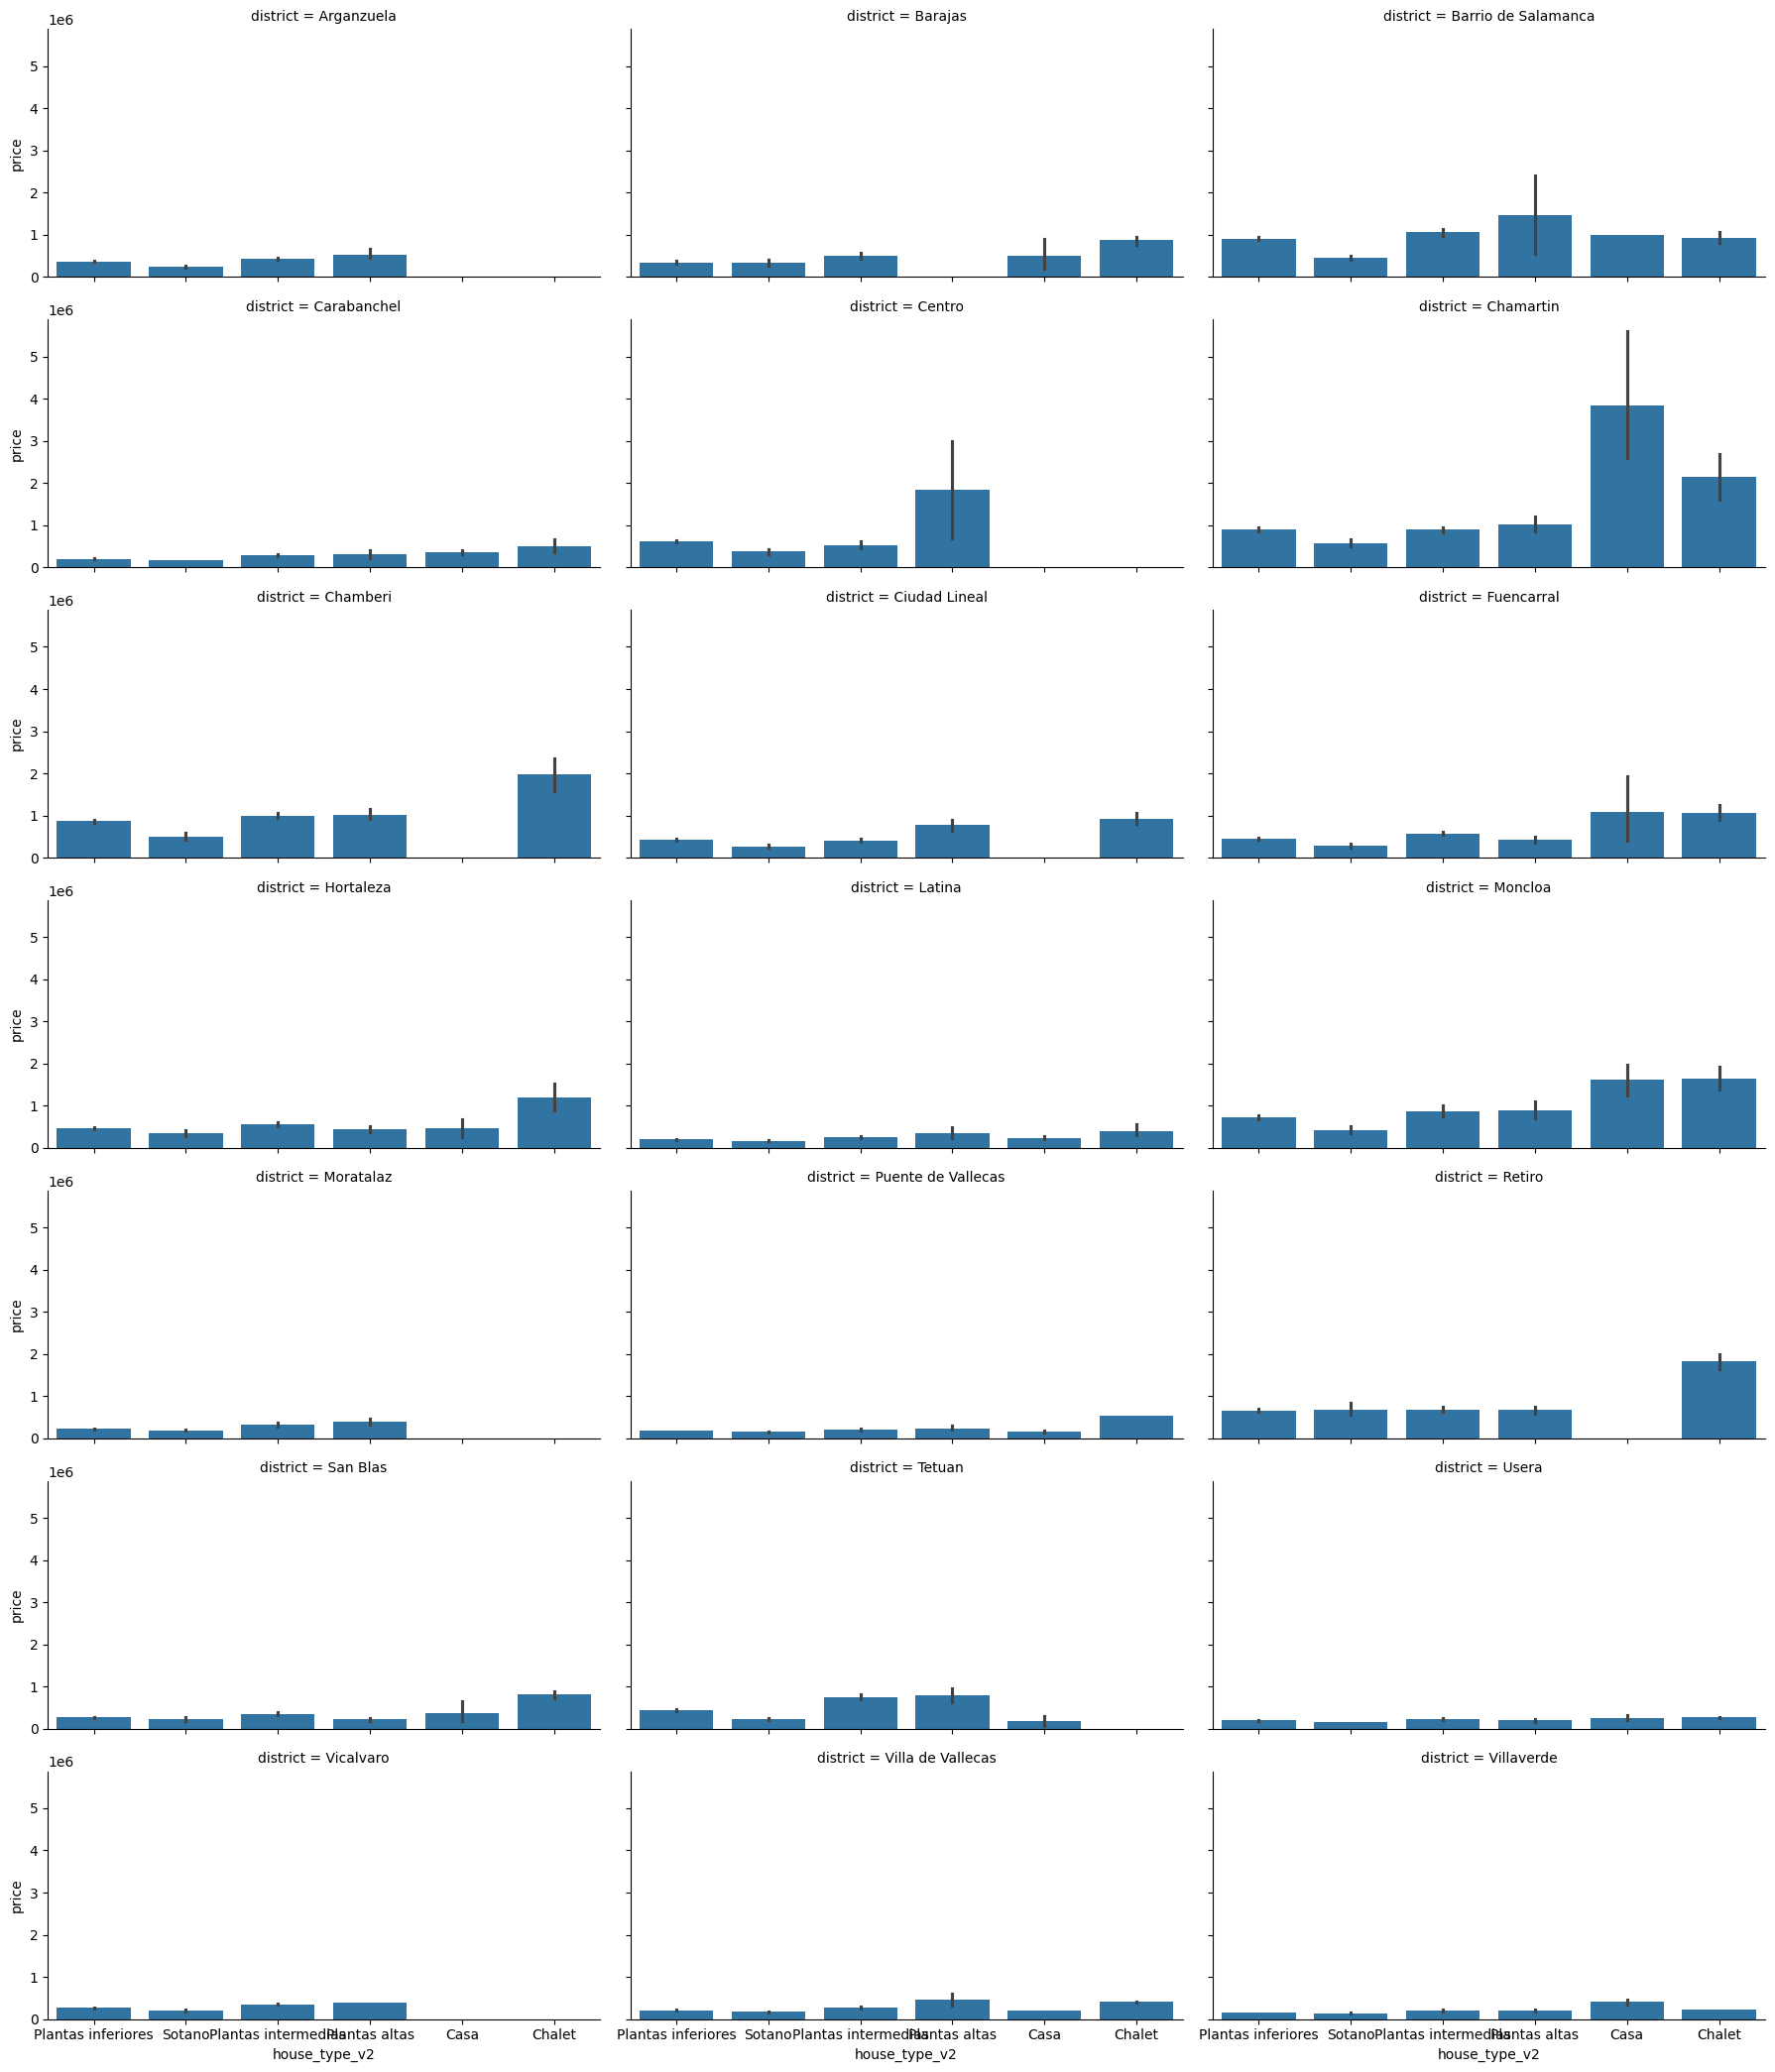

In [38]:
# Mostramos un grafico la relacion entre el precio de los inmuebles y el tipo de planta por barrios
plt.figure(figsize=(12, 6))
chart = sns.FacetGrid (df1, col = "district", col_wrap=3, aspect=2)
chart.map (sns.barplot , "house_type_v2", "price")

##Modelos predictivos

###Preparacion de datos

En este apartado vamos a realizar ciertos ajustes a la base de datos para traer solo los valores numericos que los modelos puedan utilizar para su prediccion y a su vez eliminar la variable objetivo (precio) de los datos.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tkinter import *


In [40]:
#Creamos una nueva base de datos solo con los valores numericos
ndf = df1.select_dtypes(include=[np.number])
ndf.head(10)


Number     price  rooms     m2  price_m2  elevator number  garage number  \
0       1  495000.0      3  118.0    4195.0                1              1   
1       2  485000.0      2   82.0    5915.0                1              1   
2       3  315000.0      2   72.0    4375.0                0              0   
3       4  585000.0      2  174.0    3362.0                1              1   
4       5  255000.0      3   75.0    3400.0                0              0   
5       6  299000.0      1   69.0    4333.0                1              0   
6       7  265000.0      2   54.0    4907.0                1              0   
7       8  290000.0      4   69.0    4203.0                1              0   
8       9  660220.0      3  129.0    5118.0                1              1   
9      10  525000.0      4  111.0    4730.0                1              0   

   house_type_2_numb  district number  house_type_v2_numerico  
0                1.0                1                     1.0  
1                1.0                1                     1.0  
2                1.0                1                     1.0  
3                1.0                1                     1.0  
4                1.0                1                     0.0  
5                1.0                1                     1.0  
6                1.0                1                     1.0  
7                0.0                1                     1.0  
8                1.0                1                     1.0  
9                1.0                1                     1.0

In [41]:
#Creamos la variable X que incluye la base de datos eliminando las variables "precio" y "precio por m2"
X = ndf.select_dtypes(include=[np.number]).drop(['price','price_m2',"Number"], axis=1)



In [42]:
#Revisamos que no haya valores Null en la base de datos.
X.isnull().sum()

rooms                     0
m2                        0
elevator number           0
garage number             0
house_type_2_numb         0
district number           0
house_type_v2_numerico    0
dtype: int64

In [43]:
#Determinamos la variable Y que incluye la variable objetivo del modelo (Precio)
Y = ndf['price']

###Modelo de Linear Regression

In [44]:
#Entrenamos las variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_test

5057     1300000.0
1018      650000.0
3327      185000.0
6681      820000.0
3171      150000.0
           ...    
9332      354000.0
10317     830000.0
14336     250000.0
1400     1140000.0
9180      425000.0
Name: price, Length: 2888, dtype: float64

In [49]:
y_pred

array([990681.11152203, 390883.52767361, 208547.98066282, ...,
       130350.41481885, 851248.26036137, 453033.98773399])

In [50]:
X_train

rooms     m2  elevator number  garage number  house_type_2_numb  \
4204       1   68.0                1              0                1.0   
2675       2  106.0                1              0                1.0   
11731      2   60.0                0              0                1.0   
14389      3   54.0                0              0                1.0   
5786       2   94.0                0              0                1.0   
...      ...    ...              ...            ...                ...   
5960       3  111.0                1              0                1.0   
14887      2   92.0                1              0                1.0   
6188       3  114.0                1              1                1.0   
949        2   77.0                1              0                1.0   
8240       4  151.0                1              0                1.0   

       district number  house_type_v2_numerico  
4204                 5                     1.0  
2675                 4                     1.0  
11731               14                     0.0  
14389               18                     1.0  
5786                 6                     0.0  
...                ...                     ...  
5960                 7                     1.0  
14887               19                     1.0  
6188                 7                     1.0  
949                  3                     0.0  
8240                 9                     1.0  

[11550 rows x 7 columns]

In [51]:
from sklearn.metrics import mean_absolute_error
lr_mae = (mean_absolute_error(y_test,y_pred))
print("Linear Regression MAE", lr_mae)

Linear Regression MAE 145266.76854236398


In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
lr_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Linear Regression MAPE", lr_mape)

Linear Regression MAPE 39.059989638621104


In [53]:
lr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 218188.21886713232


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular R^2
lr_r2 = r2_score(y_test, y_pred)
print("Linear Regression R^2 Score:", lr_r2)

Linear Regression R^2 Score: 0.755342280551719


###Modelo de Ridge Regression

In [55]:
ridge_model = Ridge(alpha=0.5)

In [56]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [57]:
ridge_preds = ridge_model.predict(X_test)

In [58]:
y_test

5057     1300000.0
1018      650000.0
3327      185000.0
6681      820000.0
3171      150000.0
           ...    
9332      354000.0
10317     830000.0
14336     250000.0
1400     1140000.0
9180      425000.0
Name: price, Length: 2888, dtype: float64

In [59]:
ridge_preds

array([990666.07861055, 390893.23968675, 208572.36300962, ...,
       130364.51411431, 851238.46955683, 453043.73551552])

In [60]:
from sklearn.metrics import mean_absolute_error
ridge_mae = (mean_absolute_error(y_test,ridge_preds))
print("Ridge Regression MAE", ridge_mae)

Ridge Regression MAE 145265.39048126197


In [61]:
ridge_mape = mean_absolute_percentage_error(y_test, ridge_preds)
print("Ridge Regression MAPE", ridge_mape)

Ridge Regression MAPE 39.05888082347007


In [62]:
ridge_rmse=np.sqrt(mean_squared_error(y_test, ridge_preds))
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 218188.60076950808


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular R^2
ridge_r2 = r2_score(y_test, ridge_preds)
print("Ridge Regression R^2 Score:", ridge_r2)

Ridge Regression R^2 Score: 0.7553414240852557


###Modelo Gradient Boosting Regressor

In [64]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [65]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [66]:
gb_preds = gb_model.predict(X_test)

In [67]:
y_test

5057     1300000.0
1018      650000.0
3327      185000.0
6681      820000.0
3171      150000.0
           ...    
9332      354000.0
10317     830000.0
14336     250000.0
1400     1140000.0
9180      425000.0
Name: price, Length: 2888, dtype: float64

In [68]:
gb_preds

array([1066893.97959105,  499289.50534105,  111340.48888322, ...,
        201368.5499564 , 1043440.3079909 ,  415827.37124442])

In [69]:
from sklearn.metrics import mean_absolute_error
gb_mae = (mean_absolute_error(y_test,gb_preds))
print("Gradient Boosting MAE", gb_mae)

Gradient Boosting MAE 106216.13768274765


In [70]:
gb_mape = mean_absolute_percentage_error(y_test, gb_preds)
print("Gradient Boosting MAPE", gb_mape)

Gradient Boosting MAPE 23.83687930517479


In [71]:
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
print("Gradient Boosting RMSE:", gb_rmse)

Gradient Boosting RMSE: 172480.17537720865


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular R^2
gb_r2 = r2_score(y_test, gb_preds)
print("Gradient Boosting R^2 Score:", gb_r2)

Gradient Boosting R^2 Score: 0.8471115424131597


###Modelo Random Forest Regressor

In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [74]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
rf_preds = rf_model.predict(X_test)

In [76]:
y_test

5057     1300000.0
1018      650000.0
3327      185000.0
6681      820000.0
3171      150000.0
           ...    
9332      354000.0
10317     830000.0
14336     250000.0
1400     1140000.0
9180      425000.0
Name: price, Length: 2888, dtype: float64

In [77]:
rf_preds

array([1039970.66666667,  626413.33333333,  128154.28571429, ...,
        228671.78571429,  815160.04689755,  516685.66666667])

In [78]:
from sklearn.metrics import mean_absolute_error
rf_mae = (mean_absolute_error(y_test,rf_preds))
print("Random Forest MAE", rf_mae)

Random Forest MAE 85148.86021473762


In [79]:
rf_mape = mean_absolute_percentage_error(y_test, rf_preds)
print("Random Forest MAPE", rf_mape)

Random Forest MAPE 18.438911878816388


In [80]:
rf_rmse=np.sqrt(mean_squared_error(y_test, rf_preds))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 159383.92065065994


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular R^2
rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest R^2 Score:", rf_r2)

Random Forest R^2 Score: 0.8694474555466577


###Conclusion modelos predectivos

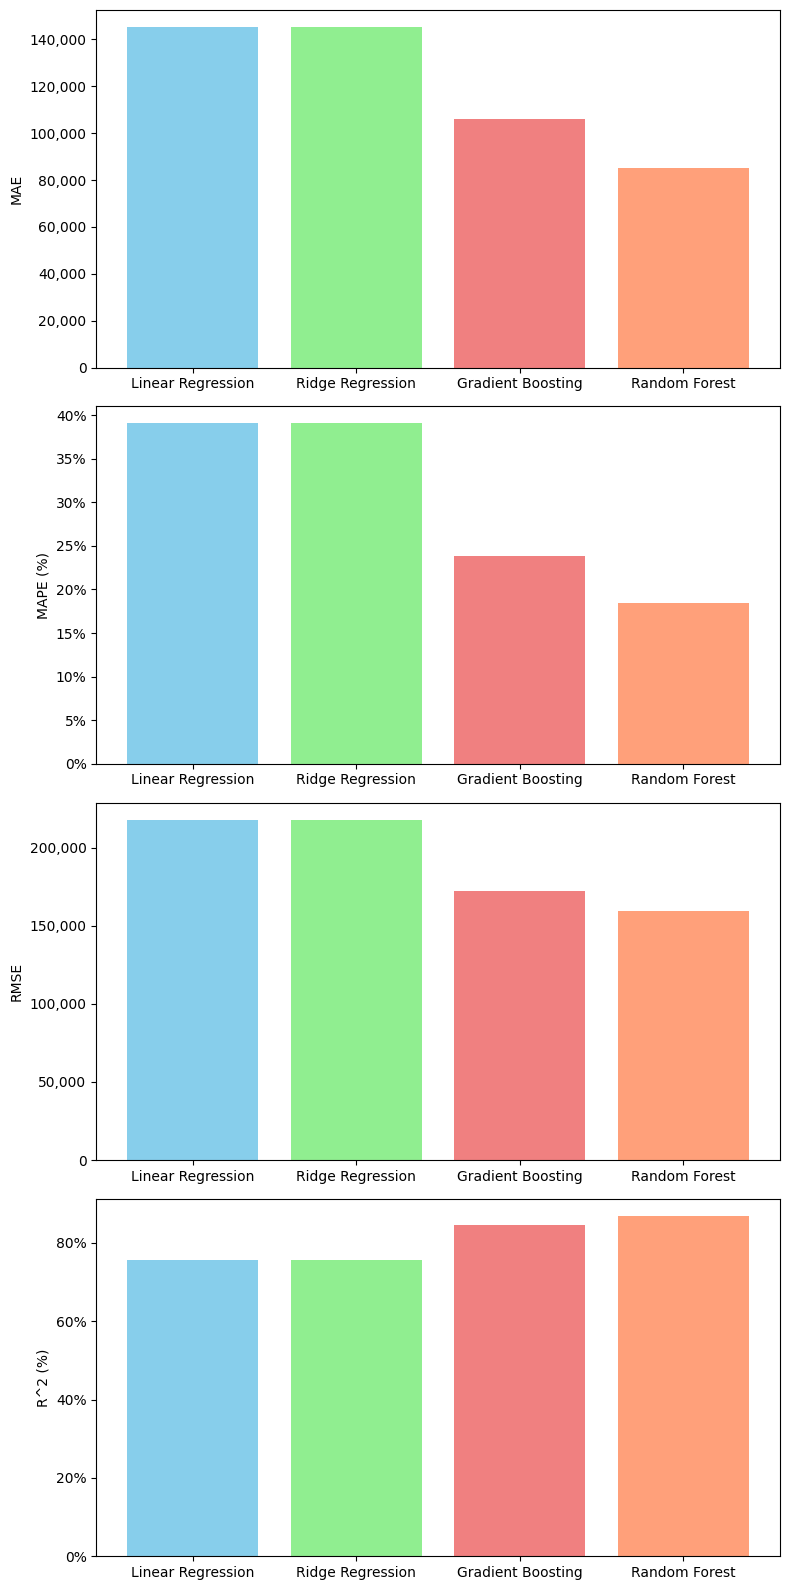

In [82]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Definir los nombres de los modelos
model_names = ['Linear Regression', 'Ridge Regression', 'Gradient Boosting', 'Random Forest']

# Definir las métricas para cada modelo
mae_values = [lr_mae, ridge_mae, gb_mae, rf_mae]
mape_values = [lr_mape, ridge_mape, gb_mape, rf_mape]
rmse_values = [lr_rmse, ridge_rmse, gb_rmse, rf_rmse]
r2_values = [lr_r2, ridge_r2, gb_r2, rf_r2]

# Convertir los valores de R^2 a porcentaje
r2_percentages = [r2 * 100 for r2 in r2_values]

# Crear subplots para cada métrica
fig, axs = plt.subplots(4, 1, figsize=(8, 16))

# Colores más claros
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Gráfico para MAE
axs[0].bar(model_names, mae_values, color=colors)
axs[0].set_ylabel('MAE')
axs[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Gráfico para MAPE
axs[1].bar(model_names, mape_values, color=colors)
axs[1].set_ylabel('MAPE (%)')
axs[1].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))

# Gráfico para RMSE
axs[2].bar(model_names, rmse_values, color=colors)
axs[2].set_ylabel('RMSE')
axs[2].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Gráfico para R^2
axs[3].bar(model_names, r2_percentages, color=colors)
axs[3].set_ylabel('R^2 (%)')
axs[3].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Basándonos en las métricas de evaluación, observamos que los modelos de regresión lineal y regresión ridge muestran un rendimiento moderado, con un MAE y RMSE relativamente altos y un coeficiente de determinación (R2) del 75.53%. Por otro lado, Gradient Boosting muestra una mejora significativa con un MAE y RMSE más bajos y un (R2) del 84.71%. Sin embargo, el modelo Random Forest destaca con el mejor rendimiento en todas las métricas, con un MAE y RMSE más bajos y un (R2) del 86.94%. Destaca especialmente su MAPE del 18.43%, que es la más baja de los cuatro modelos. Esto significa que, en promedio, las predicciones del modelo difieren en un 18.43% de los valores reales. Por lo tanto, para la tarea de predicción de precios de inmuebles, el modelo Random Forest parece ser la opción más adecuada debido a su mayor precisión y capacidad explicativa.



##Analisis Bivariado

In [83]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 20.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=5bbe9aeabe74b5bb0ba92a053efb5fad2d01e6818c1c6e2fb0d9bb65ca2d426c
  Stored in directory: /tmp/pip-ephem-wheel-cache-huz8vqx0/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=200e8e98b3533446a1bb4326209f14549d7c403d500b13e96ca91b7da1c5d4da
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [84]:
# Importamos librerias
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-84-9d13cbf120e3>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [85]:
df1.head()

Number     price house_type       house_type_v2 house_type_2  rooms  \
0       1  495000.0   planta 1  Plantas inferiores     exterior      3   
1       2  485000.0   planta 2  Plantas inferiores     exterior      2   
2       3  315000.0   planta 2  Plantas inferiores     exterior      2   
3       4  585000.0   planta 4  Plantas inferiores     exterior      2   
4       5  255000.0       bajo              Sotano     exterior      3   

      rooms_v2     m2            m2_v2  price_m2 elevator garage  \
0  1 - 5 rooms  118.0  Piso intermedio    4195.0       SI     SI   
1  1 - 5 rooms   82.0     Piso pequeño    5915.0       SI     SI   
2  1 - 5 rooms   72.0     Piso pequeño    4375.0       NO     NO   
3  1 - 5 rooms  174.0      Piso grande    3362.0       SI     SI   
4  1 - 5 rooms   75.0     Piso pequeño    3400.0       NO     NO   

      neighborhood    district  elevator number  garage number  \
0          Chopera  Arganzuela                1              1   
1  Palos de Moguer  Arganzuela                1              1   
2          Legazpi  Arganzuela                0              0   
3  Palos de Moguer  Arganzuela                1              1   
4          Acacias  Arganzuela                0              0   

   house_type_2_numb  district number  house_type_v2_numerico  \
0                1.0                1                     1.0   
1                1.0                1                     1.0   
2                1.0                1                     1.0   
3                1.0                1                     1.0   
4                1.0                1                     0.0   

                 Combination  
0  Con Garage y Con Elevador  
1  Con Garage y Con Elevador  
2  Sin Garage y Sin Elevador  
3  Con Garage y Con Elevador  
4  Sin Garage y Sin Elevador

In [86]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Modelo de prediccion del precio de Inmuebles (El Codigo no va a terminar de ejecutarse hasta que el usuario no complete los inputs necesarios para la prediccion)

A traves de los datos obtenidos, hemos entrenado un modelo de Random Forest para poder determinar el precio de un inmueble en Madrid segun las siguientes caracteristicas:

* Cantidad de habitaciones
* Cantidad de M2
* Si tiene elevador o no
* Si tiene garage o no
* Si es interior o exterior
* En qué planta se encuentra
* En qué barrio se encuentra

In [98]:
# @title
from IPython.display import display, HTML

# Función para solicitar y validar una entrada numérica en un rango específico
def solicitar_entrada(mensaje, min_val, max_val, tipo=int):
    while True:
        try:
            valor = tipo(input(mensaje))
            if min_val <= valor <= max_val:
                return valor
            else:
                print(f"Por favor, ingresa un valor entre {min_val} y {max_val}.")
        except ValueError:
            print(f"Por favor, ingresa un valor {tipo.__name__} válido.")

# Función para solicitar características al usuario y realizar la predicción
def predecir_precio(model):
    print("Por favor, ingresa las características del inmueble:")

    # Solicitar el número de habitaciones
    habitaciones = solicitar_entrada("Ingrese el numero de habitaciones (entre 1 y 13): ", 1, 13)

    # Solicitar los metros cuadrados
    m2 = solicitar_entrada("Ingrese los M2 (entre 20 y 800): ", 20, 800, float)

    # Solicitar si tiene elevador
    elevador = solicitar_entrada("Tiene elevador (0 para no, 1 para sí): ", 0, 1)

    # Solicitar si tiene garage
    garage = solicitar_entrada("Tiene garage (0 para no, 1 para sí): ", 0, 1)

    # Solicitar si es interior o exterior
    interior_exterior = solicitar_entrada("Es interior (0) o exterior (1): ", 0, 1)

    # Mostrar listado de tipos de inmueble disponibles
    print("Tipos de inmueble disponibles:")
    for numero, tipo in tipos_inmueble.items():
        print(f"{numero}: {tipo}")

    # Solicitar el tipo de inmueble
    tipo_inmueble = solicitar_entrada("Ingrese el número del tipo de inmueble: ", 0, len(tipos_inmueble) - 1)

    # Mostrar listado de barrios disponibles
    print("Barrios disponibles:")
    for barrio, numero in barrios_disponibles.items():
        print(f"{numero}: {barrio}")

    # Solicitar el barrio
    barrio = solicitar_entrada("Ingrese el número del barrio en el que se encuentra: ", 1, 21)

    # Realizar la predicción utilizando el modelo entrenado
    caracteristicas = [habitaciones, m2, elevador, garage, interior_exterior, tipo_inmueble, barrio]
    precio_predicho = model.predict([caracteristicas])

    if precio_predicho[0] < 0:
        display(HTML("<h2 style='color: red;'><strong>No encontramos un inmueble con esas características.</strong></h2>"))
    else:
        precio_predicho_str = "{:,.2f}".format(precio_predicho[0])
        display(HTML(f"<h2><strong>El precio estimado del inmueble es: €{precio_predicho_str}</strong></h2>"))




In [101]:
predecir_precio(model)

Por favor, ingresa las características del inmueble:
Ingrese el numero de habitaciones (entre 1 y 13): 30
Por favor, ingresa un valor entre 1 y 13.
Ingrese el numero de habitaciones (entre 1 y 13): 5
Ingrese los M2 (entre 20 y 800): 200
Tiene elevador (0 para no, 1 para sí): 1
Tiene garage (0 para no, 1 para sí): 1
Es interior (0) o exterior (1): 1
Tipos de inmueble disponibles:
0: Sotano
1: Plantas inferiores (1-4)
2: Plantas intermedias (5-9)
3: Plantas altas (10+)
4: Casa
5: Chalet
Ingrese el número del tipo de inmueble: 1
Barrios disponibles:
1: Arganzuela
2: Barajas
3: Barrio de Salamanca
4: Carabanchel
5: Centro
6: Chamartin
7: Chamberi
8: Ciudad Lineal
9: Fuencarral
10: Hortaleza
11: Latina
12: Moncloa
13: Moratalaz
14: Puente de Vallecas
15: Retiro
16: San Blas
17: Tetuan
18: Usera
19: Vicalvaro
20: Villa de Vallecas
21: Villaverde
Ingrese el número del barrio en el que se encuentra: 14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Conclusiones


El mercado inmobiliario en Madrid ofrece una amplia diversidad de opciones para los potenciales compradores, desde propiedades de lujo en barrios exclusivos hasta opciones más asequibles en áreas periféricas. Esta variedad permite a los compradores encontrar la vivienda que mejor se adapte a sus necesidades y presupuesto.

Al analizar los datos, se destaca el barrio de Salamanca por su variada oferta de inmuebles en venta, aunque con precios más elevados en comparación con otras zonas de la ciudad. Por otro lado, áreas como Villaverde y Usera presentan precios más accesibles, lo que puede resultar atractivo para aquellos con un presupuesto más limitado.

Un factor determinante en la valoración de un inmueble es la presencia de un elevador, que puede impactar significativamente en el precio final. Es esencial que los compradores evalúen cuidadosamente si necesitan esta facilidad y consideren el posible aumento en el costo al tomar su decisión de compra.

Además, se observa que las plantas más bajas de un edificio suelen tener precios más bajos, lo que puede representar una oportunidad para aquellos que buscan una opción más económica sin comprometer demasiado la calidad de la propiedad.

En resumen, el análisis detallado de los precios de los inmuebles en Madrid según sus características revela la importancia de realizar una evaluación exhaustiva y considerar diversos factores antes de tomar la decisión de compra. Esta información es fundamental para los compradores, especialmente aquellos que están buscando su primer hogar en la ciudad.
